# Fitness of yeast KO-strains in pesticidal environment (DDT)

A plate reader was used to test yeast KO-strains when treated with varying concentrations of pesticide.

## Data preprocessing
The xlsx file generated by the plate reader is put into a dataframe.

In [1]:
import pandas as pd
import numpy as np

def get_dataframe_from_xlsx(path):
    df = pd.read_excel(path,header=None)

    df_list = np.split(df, df[df.isnull().all(1)].index)
    df_list_new = []
    for i in range(len(df_list)):
        df = df_list[i]
        df.columns = df.iloc[0 if i == 0 else 1] #set header
        df = df.iloc[1 if i == 0 else 2:] #delete first row (header)
        df = df.set_index('Kinetic read') #set index
        df = df[df.columns.dropna()] #remove empty columns
        df = df.dropna() #remove all empty lines
        df_list_new.append(df)
    return pd.concat(df_list_new,axis=1)

df = get_dataframe_from_xlsx('../data/20200724_plate 3.xlsx')
df.head()

,A1,B1,C1,D1,E1,F1,G1,H1,A2,B2,...,G11,H11,A12,B12,C12,D12,E12,F12,G12,H12
Kinetic read,,,,,,,,,,,,,,,,,,,,,
00:04:22,0.109,0.112,0.116,0.119,0.111,0.11,0.113,0.111,0.116,0.111,...,0.111,0.112,0.108,0.107,0.11,0.09,0.114,0.108,0.111,0.117
00:09:22,0.109,0.113,0.116,0.118,0.111,0.11,0.113,0.111,0.116,0.111,...,0.111,0.112,0.108,0.107,0.11,0.09,0.113,0.108,0.111,0.117
00:14:22,0.109,0.113,0.116,0.117,0.11,0.11,0.112,0.11,0.116,0.11,...,0.11,0.112,0.107,0.107,0.11,0.09,0.113,0.108,0.111,0.117
00:19:22,0.109,0.113,0.115,0.117,0.11,0.11,0.111,0.109,0.115,0.11,...,0.11,0.112,0.107,0.106,0.11,0.09,0.112,0.108,0.11,0.117
00:24:22,0.109,0.113,0.115,0.117,0.11,0.11,0.111,0.109,0.115,0.11,...,0.11,0.112,0.107,0.106,0.109,0.09,0.112,0.108,0.11,0.117


In [2]:
import string

alph = string.ascii_uppercase
def get_replicates_index(s,c,corrected=False): #s is the strain [0,1,2,3] and c the concentration [0,1,2,3,4,5]
    if corrected:
        return [alph[s*2]+str(c+1),alph[s*2]+str((c+1)+6),alph[s*2+1]+str(c+1)]
    else:
        if s == 0:
            return [alph[s*2]+str(c+1),alph[s*2]+str((c+1)+6),alph[s*2+1]+str(c+1)]
        else:
            return [alph[s*2]+str(c+1),alph[s*2]+str((c+1)+6),alph[s*2+1]+str(c+1),alph[s*2+1]+str((c+1)+6)]

def get_series(df,i):
    return df[i][:-1]

def get_series_mean(df,s,c,corrected=False):
    i = get_replicates_index(s,c,corrected)
    return df[i][:-1].mean(axis=1), df[i][:-1].sem(axis=1)

In [3]:
import datetime

def get_timestamps(df):
    my_day = datetime.date(2020, 7, 24)
    return [datetime.datetime.combine(my_day, t) for t in df.index.to_list()[:-1]]

## Plots

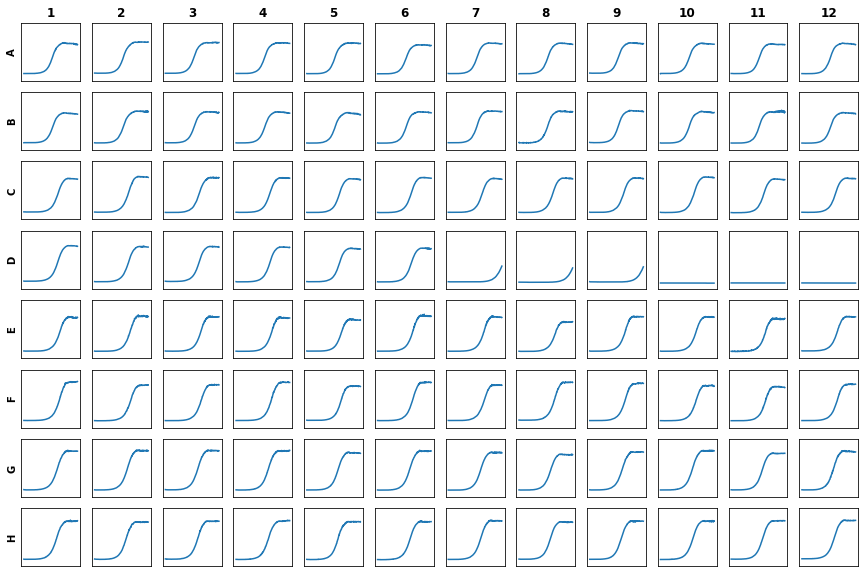

In [4]:
import matplotlib.pyplot as plt
import string

alph = string.ascii_uppercase
fig, axs = plt.subplots(8, 12)
fig.set_figheight(10)
fig.set_figwidth(15)
x = get_timestamps(df)
for i in range(8):
    axs[i,0].set_ylabel(alph[i],fontweight='bold')
    for j in range(12):
        plt.sca(axs[i,j])
        if(i==0):
            plt.title(j+1,fontweight='bold')
        y = get_series(df,alph[i]+str(j+1))
        plt.plot(x,y)
        plt.xticks([])
        plt.yticks([])
        axs[i,j].set_ylim([0, 0.9])
plt.show()

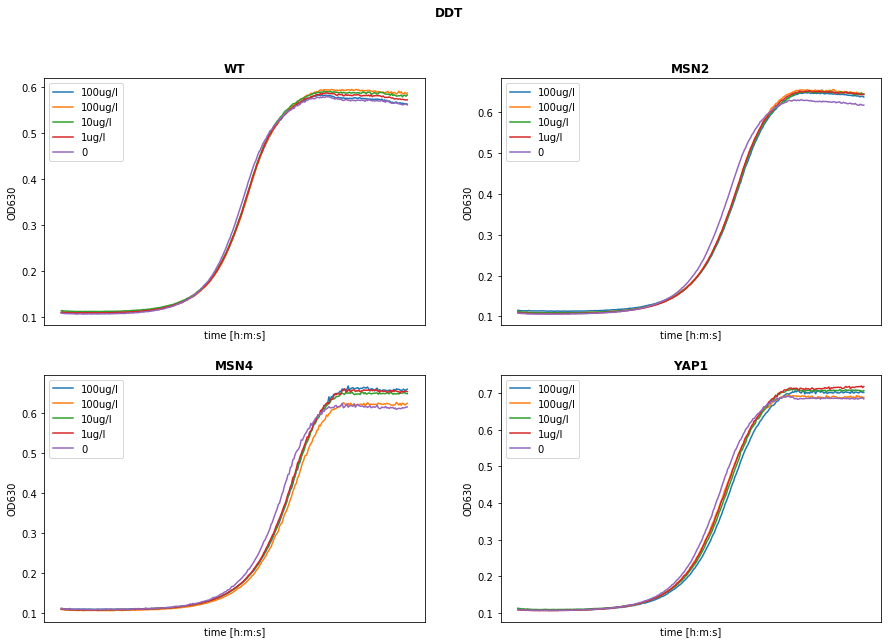

In [17]:
import matplotlib.pyplot as plt

x = get_timestamps(df)
supt = ['WT','MSN2','MSN4','YAP1']
conc = ['100ug/l','100ug/l','10ug/l','1ug/l','0']
fig,axs = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
for i in range(2):
    for j in range(2):
        for n in range(0,5): # excluding highest concentration and methanol control
            plt.sca(axs[i,j])
            y, se = get_series_mean(df,i*2+j,n,True)
            plt.plot(x,y)
        plt.xticks([])
        plt.title(supt[i*2+j],fontweight='bold')
        plt.legend(conc)
        axs[i,j].set_ylabel('OD630')
        axs[i,j].set_xlabel('time [h:m:s]')
fig.suptitle('DDT',fontweight='bold')
plt.show()